**Поведенческий скоринг**

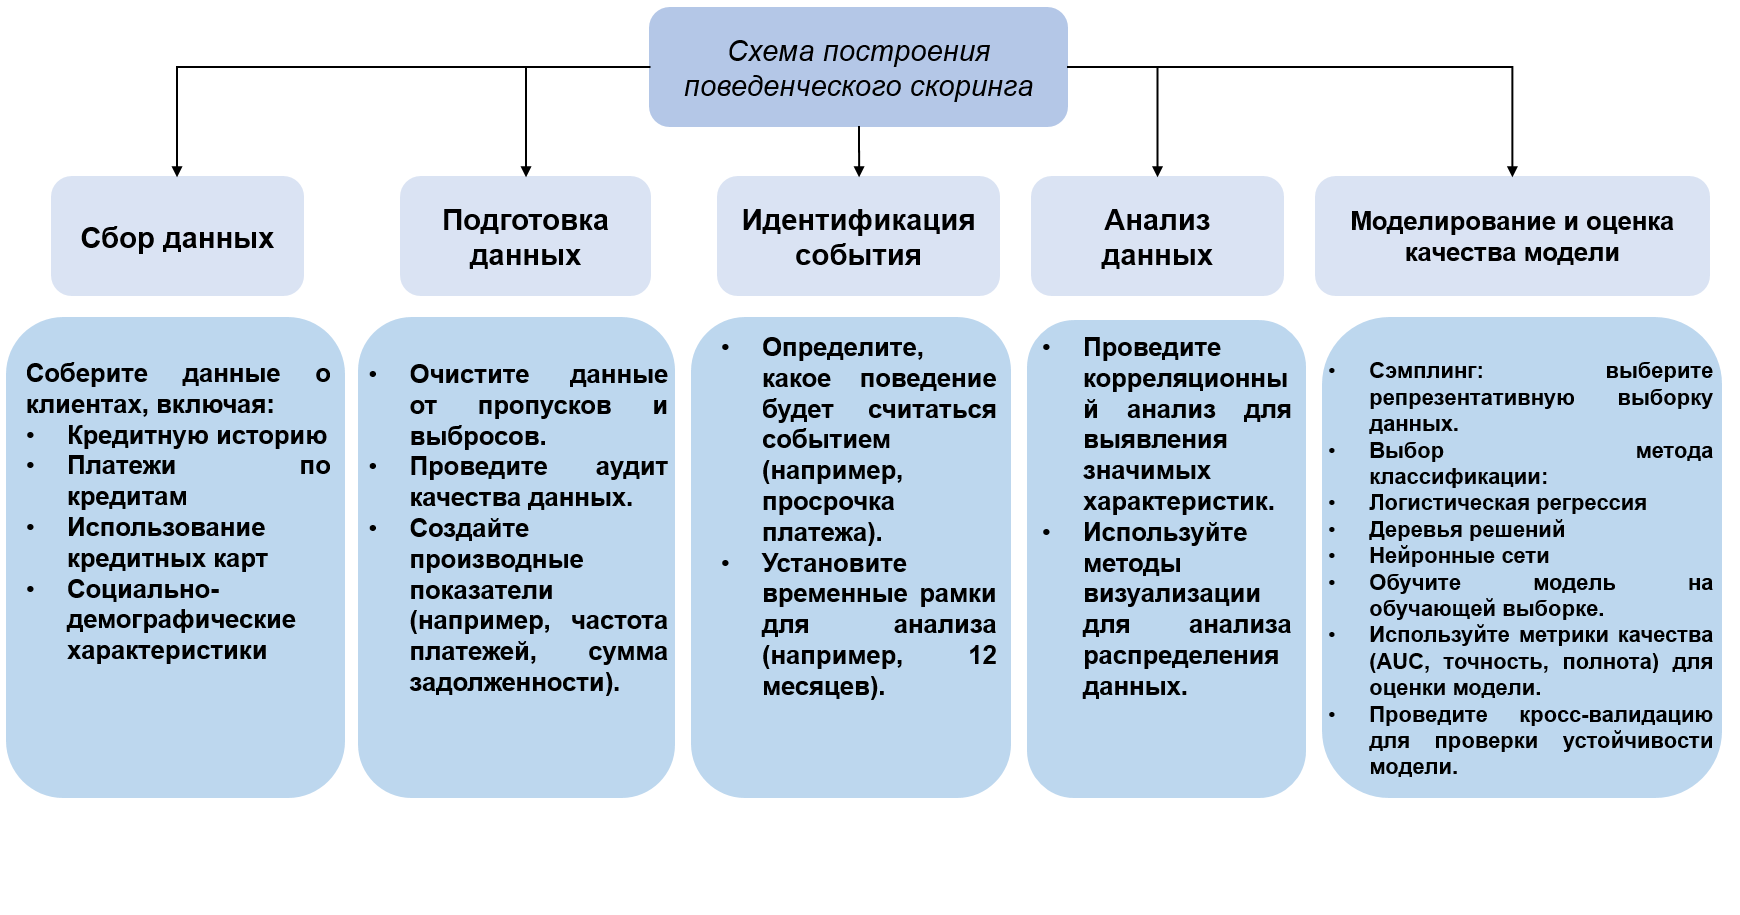

Также в схему построения поведенческого скоринга входят:
- Интеграция и тестирование:
```
 - Внедрите модель в систему принятия решений.
 - Проведите тестирование на новых данных.
```
- Мониторинг и обновление:
```
  - Регулярно оценивайте эффективность модели.
  - Обновляйте модель по мере поступления новых данных и изменений в поведении клиентов.
```

## 1. Сбор данных.

Данные для построения поведенческого скоринга взяты с сайта kaggle: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('/content/UCI_Credit_Card.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


Датасет включает следующие поля:
- ID: Уникальный идентификатор клиента.
- LIMIT_BAL: Кредитный лимит.
- SEX: Пол клиента (1 = мужской, 2 = женский).
- EDUCATION: Уровень образования (1 = высшее, 2 = среднее, 3 = начальное, 4 = другие).
- MARRIAGE: Семейное положение (1 = женат/замужем, 2 = холост/незамужем, 3 = вдовец/вдова).
- AGE: Возраст клиента.
- PAY_0 - PAY_6: Статусы платежей за последние шесть месяцев (где 1 = платеж вовремя, 2 = задержка на один месяц и т.д.).
- BILL_AMT1 - BILL_AMT6: Суммы счетов за последние шесть месяцев.
- PAY_AMT1 - PAY_AMT6: Суммы платежей за последние шесть месяцев.
- default.payment.next.month: Целевая переменная, указывающая на то, произойдет ли дефолт по кредиту в следующем месяце (1 = да, 0 = нет).

## 2. Подготовка данных.

In [3]:
# Очистка данных от пропусков
data.dropna(inplace=True)

In [4]:
# Аудит качества данных
print("Общая информация о данных:")
data.info()

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL

In [5]:
print("\nСтатистические характеристики:")
data.describe()


Статистические характеристики:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
print("\nПроверка на дубликаты:")
print(f"Количество дубликатов: {data.duplicated().sum()}")


Проверка на дубликаты:
Количество дубликатов: 0


In [7]:
print("\nПроверка на пропуски:")
data.isnull().sum()


Проверка на пропуски:


,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [8]:
# Создание производных показателей
# Частота платежей: общее количество платежей за последние 6 месяцев
data.loc[:, 'PAY_COUNT'] = (data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] != 0).sum(axis=1)

In [9]:
# Сумма задолженности: сумма всех счетов за последние 6 месяцев
data.loc[:, 'TOTAL_BILL'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

In [10]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_COUNT,TOTAL_BILL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,6,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,2,109339.0


## 3. Идентификация события

In [11]:
# Определение события: просрочка платежа
# Мы будем считать событием, если клиент не выполнил платеж в срок хотя бы один раз за 12 месяцев.
# В данном случае у нас есть данные только за 6 месяцев, поэтому мы будем использовать их для анализа.

# Создание новой колонки для идентификации события
data.loc[:, 'EVENT'] = (data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] < 0).any(axis=1).astype(int)

Событием считается просрочка платежа, если хотя бы один из статусов платежей (PAY_0 до PAY_6) меньше нуля.

In [12]:
# Установите временные рамки для анализа (6 месяцев)
event_count = data['EVENT'].value_counts()
print("Количество событий (просрочка платежа):")
event_count

Количество событий (просрочка платежа):


,count
EVENT,
0,16111
1,13889


In [13]:
data[['ID', 'EVENT']].head()

,ID,EVENT
0,1,1
1,2,1
2,3,0
3,4,0
4,5,1


## 4. Анализ данных

In [14]:
# Корреляционный анализ
correlation_matrix = data.corr()

In [15]:
print("Корреляционная матрица:")
correlation_matrix

Корреляционная матрица:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_COUNT,TOTAL_BILL,EVENT
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952,-0.015691,0.023723,-0.006291
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,0.133374,0.302044,0.238305
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961,0.032157,-0.025920,0.044795
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006,-0.122214,0.007750,-0.128583
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339,-0.066706,-0.024507,-0.035333
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,0.067628,0.054981,0.039887
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,-0.156251,0.191803,-0.473578
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,-0.232744,0.238182,-0.550426
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,-0.250682,0.235960,-0.557528
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,-0.275602,0.244561,-0.583703


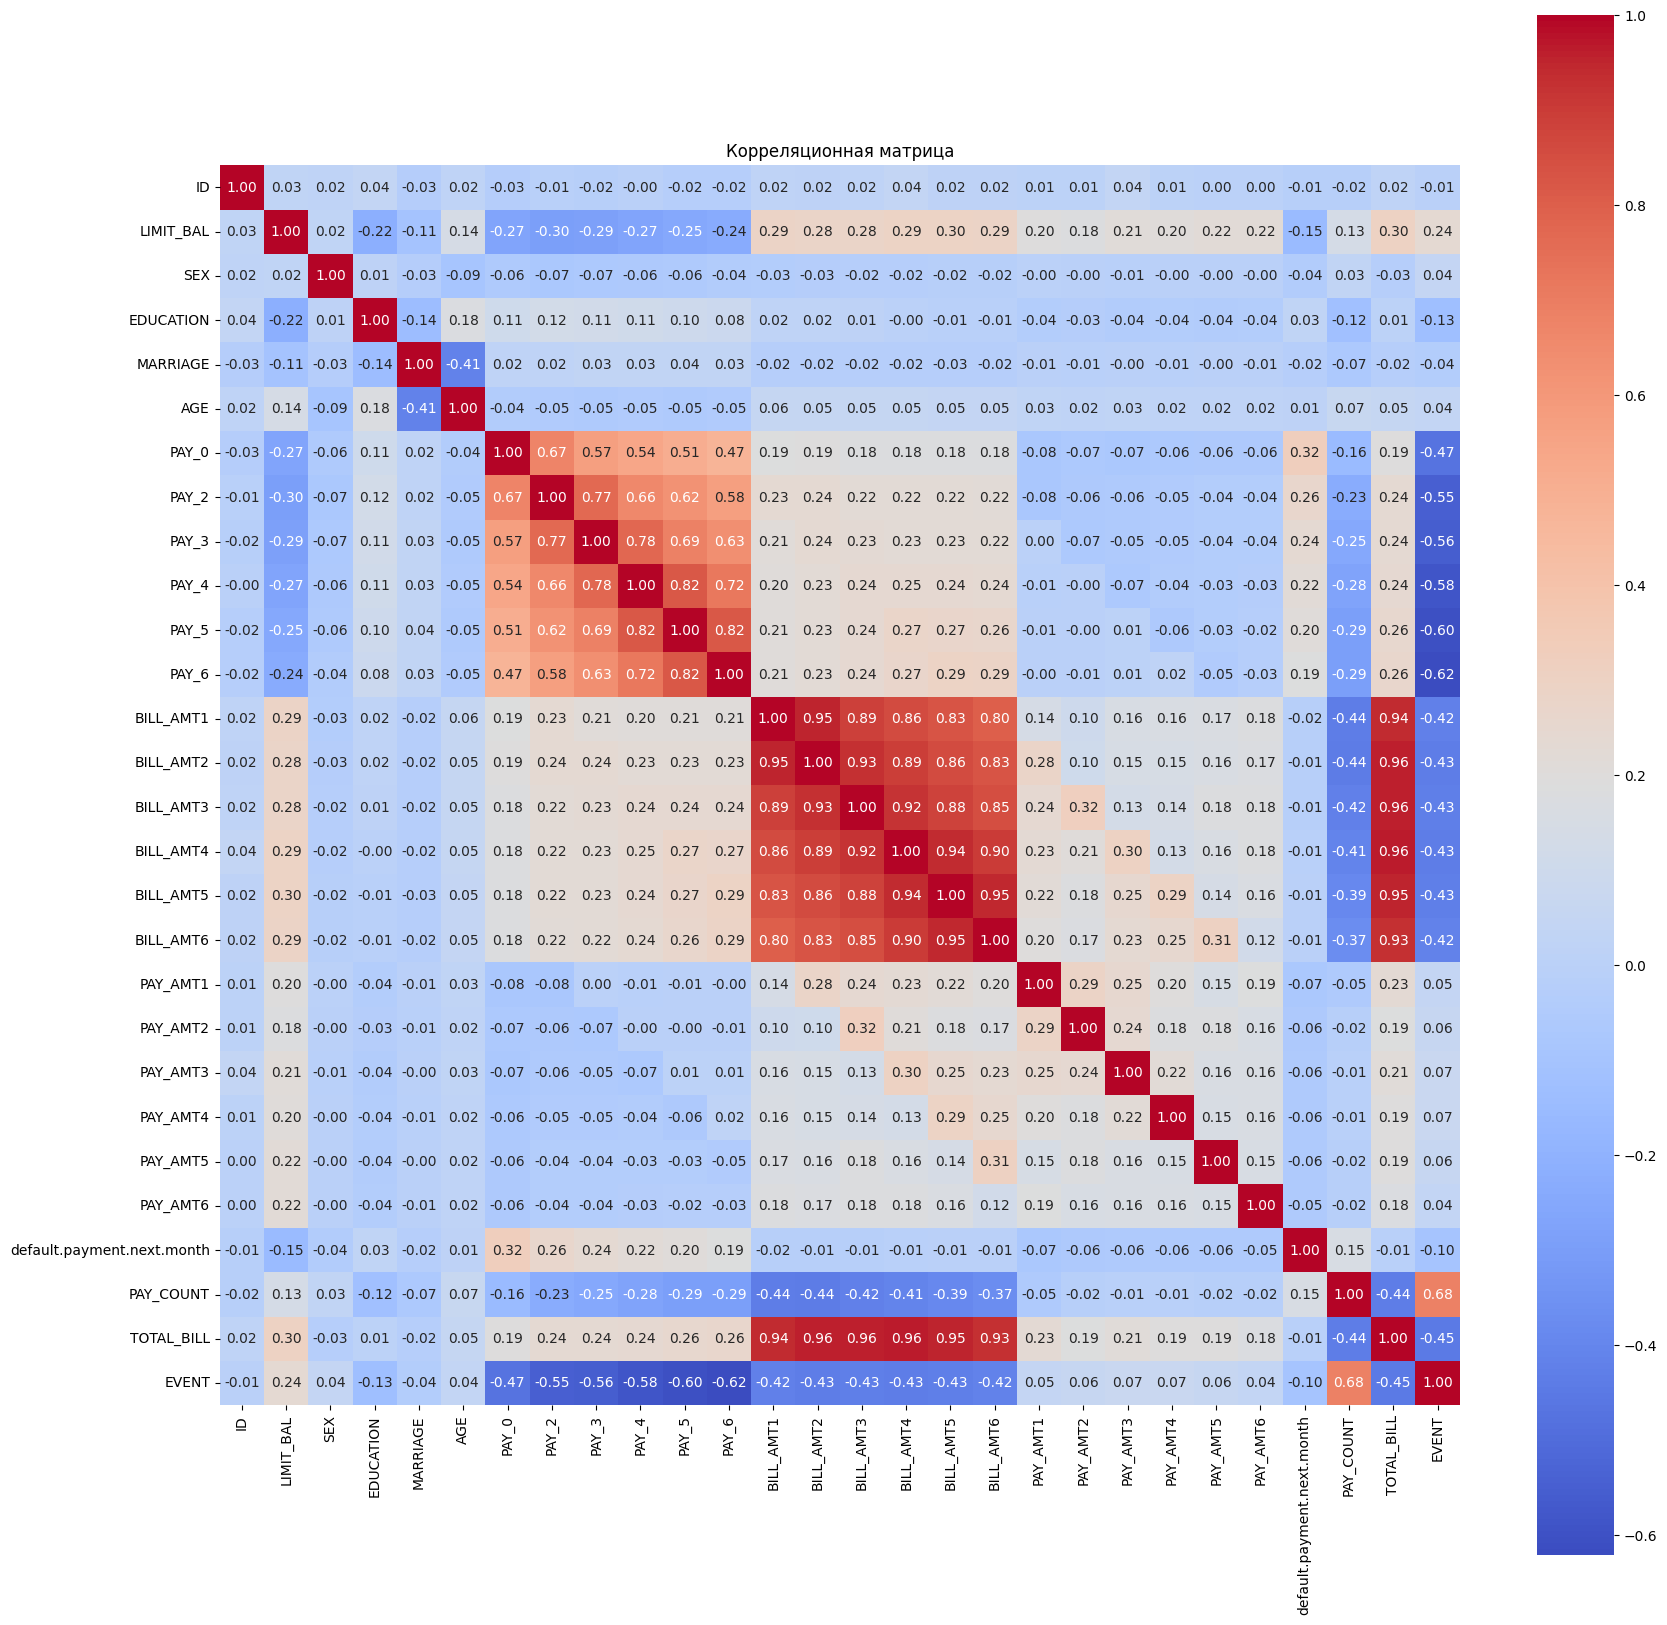

In [16]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

In [17]:
# Анализ распределения данных
# Визуализация распределения некоторых ключевых характеристик
features_to_plot = ['LIMIT_BAL', 'AGE', 'BILL_AMT1']

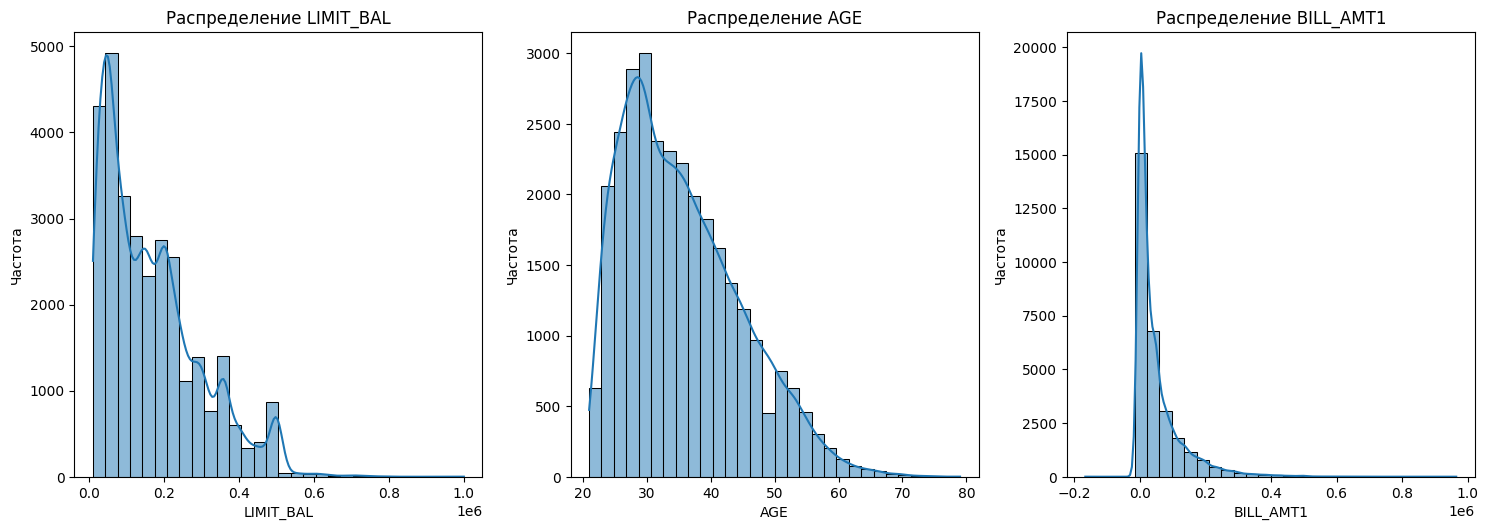

In [18]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

## 5. Моделирование

In [19]:
# Сэмплинг: выбор репрезентативной выборки данных
# Для примера, используем 20% данных для обучения и 80% для тестирования
X = data.drop(columns=['ID', 'default.payment.next.month'])  # Признаки
y = data['default.payment.next.month']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Проверка распределения классов в целевой переменной
print("Распределение классов в целевой переменной:")
print(y.value_counts())

Распределение классов в целевой переменной:
default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


In [21]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_COUNT,TOTAL_BILL,EVENT
22788,160000.0,2,2,2,33,2,2,3,2,0,...,163005.0,15000.0,0.0,0.0,6100.0,12300.0,6100.0,4,992940.0,0
29006,150000.0,2,1,2,34,1,-1,-1,-2,-2,...,0.0,53.0,0.0,0.0,0.0,0.0,0.0,6,53.0,1
16950,10000.0,1,2,1,50,1,2,0,0,0,...,8400.0,2.0,1281.0,1134.0,294.0,305.0,1000.0,2,51461.0,0
22280,220000.0,2,1,2,29,0,0,0,0,0,...,134346.0,9100.0,9000.0,7887.0,4800.0,4900.0,6000.0,0,1117574.0,0
11346,310000.0,2,1,2,32,1,-2,-1,0,0,...,-235.0,0.0,326.0,0.0,0.0,0.0,1200.0,4,182.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,100000.0,2,2,2,31,0,0,0,0,0,...,97241.0,3309.0,4421.0,5486.0,3400.0,3541.0,3894.0,0,570405.0,0
13921,120000.0,2,2,2,24,0,0,0,0,0,...,121962.0,4200.0,4100.0,4100.0,10000.0,4560.0,0.0,1,699239.0,0
3794,120000.0,2,1,2,24,0,0,0,0,0,...,19826.0,3700.0,2023.0,2016.0,2000.0,1200.0,1000.0,0,321925.0,0
27565,360000.0,1,1,1,57,1,-2,-1,-1,-1,...,-46.0,0.0,860.0,246.0,0.0,0.0,0.0,6,1014.0,1


In [22]:
y_train

,default.payment.next.month
22788,0
29006,0
16950,0
22280,1
11346,0
...,...
23479,1
13921,0
3794,0
27565,0


In [23]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Логистическая регрессия с увеличением max_iter
log_reg = LogisticRegression(max_iter=2000)  # Увеличиваем max_iter до 2000
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_log_reg_proba = log_reg.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
# Оценка качества модели логистической регрессии
print("Логистическая регрессия:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Логистическая регрессия:
[[4481  192]
 [ 954  373]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4673
           1       0.66      0.28      0.39      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000



In [26]:
# Проверка наличия обоих классов в тестовой выборке для AUC
# Площадь под ROC-кривой (AUC)
if len(set(y_test)) == 2:
    auc_score_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
    print("AUC:", auc_score_log_reg)
else:
    print("AUC не может быть вычислен для логистической регрессии.")

print("Точность:", accuracy_score(y_test, y_pred_log_reg))
print("Полнота:", recall_score(y_test, y_pred_log_reg))

AUC: 0.742502867649798
Точность: 0.809
Полнота: 0.28108515448379806


In [27]:
# Кросс-валидация для логистической регрессии
cv_scores_log_reg = cross_val_score(log_reg, scaler.fit_transform(X), y, cv=5)  # Масштабируем данные для кросс-валидации
print("Кросс-валидация (логистическая регрессия):", cv_scores_log_reg.mean())

Кросс-валидация (логистическая регрессия): 0.8090666666666667


In [28]:
# Вычисление ROC и AUC для логистической регрессии
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_proba)

In [29]:
# Деревья решений
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_tree_proba = decision_tree.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

In [30]:
# Оценка качества модели деревьев решений
print("Деревья решений:")
print(confusion_matrix(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))

# Проверка наличия обоих классов в тестовой выборке
if len(set(y_test)) == 2:
    auc_score = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
    print("AUC:", auc_score)
else:
    print("AUC не может быть вычислен, так как в тестовой выборке присутствует только один класс.")

print("Точность:", accuracy_score(y_test, y_pred_decision_tree))
print("Полнота:", recall_score(y_test, y_pred_decision_tree))

Деревья решений:
[[3815  858]
 [ 816  511]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4673
           1       0.37      0.39      0.38      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.72      0.72      0.72      6000

AUC: 0.6015234303880733
Точность: 0.721
Полнота: 0.3850791258477769


In [31]:
# Кросс-валидация для деревьев решений
cv_scores_decision_tree = cross_val_score(decision_tree, X, y, cv=5)
print("Кросс-валидация (деревья решений):", cv_scores_decision_tree.mean())

Кросс-валидация (деревья решений): 0.7278333333333334


In [32]:
# Вычисление ROC и AUC для деревьев решений
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree_proba)
roc_auc_tree = auc(fpr_tree, tpr_tree)

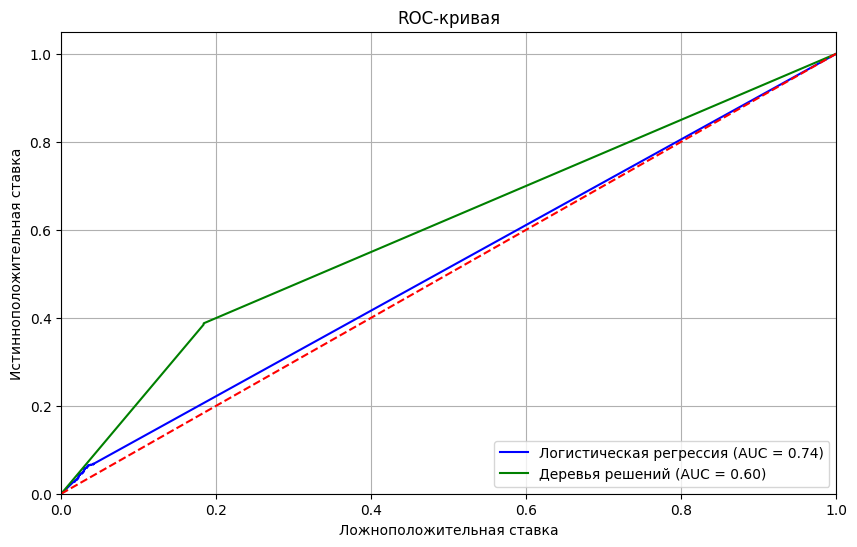

In [33]:
# Построение ROC кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label='Логистическая регрессия (AUC = {:.2f})'.format(auc_score_log_reg))
plt.plot(fpr_tree, tpr_tree, color='green', label='Деревья решений (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительная ставка')
plt.ylabel('Истинноположительная ставка')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()

1. Сравнение производительности моделей
- Логистическая регрессия (AUC = 0.74): Значение AUC выше 0.7 указывает на хорошую способность модели различать между классами (в данном случае, между клиентами, которые допустят просрочку платежа, и теми, кто не допустит). Это означает, что модель достаточно хорошо предсказывает вероятность дефолта.
- Деревья решений (AUC = 0.60): Значение AUC ниже 0.7 говорит о том, что модель имеет слабую способность различать между классами. Это может указывать на то, что деревья решений не смогли эффективно уловить паттерны в данных или что данные могут быть слишком сложными для этой модели без дополнительной настройки.

2. Выбор модели
- На основании AUC логистической регрессии, она является предпочтительной моделью для данной задачи, так как она показывает лучшую производительность по сравнению с деревьями решений.
- Если AUC деревьев решений значительно ниже, это может означать, что стоит рассмотреть другие методы улучшения модели (например, настройка гиперпараметров, использование ансамблевых методов или других алгоритмов).

На основе построенного поведенческого скоринга можно сделать несколько выводов о клиентской базе и их вероятности дефолта по кредитам. Вот основные моменты, которые стоит рассмотреть:
1. Анализ переменных
- Кредитный лимит (LIMIT_BAL): Более высокий кредитный лимит может быть связан с меньшей вероятностью дефолта, так как клиенты с высоким лимитом могут иметь более стабильное финансовое положение.
- Пол (SEX): Возможно, стоит проанализировать, есть ли значительная разница в поведении между мужчинами и женщинами в контексте просрочек платежей.
- Образование (EDUCATION): Уровень образования может влиять на финансовую грамотность клиентов; стоит проверить, как это соотносится с вероятностью дефолта.
- Семейное положение (MARRIAGE): Анализ семейного положения может показать, как оно влияет на финансовую ответственность и вероятность дефолта.
- Возраст (AGE): Более молодые или более пожилые клиенты могут иметь разные финансовые привычки.

2. Платежная история
- Поля PAY_0 до PAY_6 показывают статус платежей за последние 6 месяцев. Наличие задержек в платежах (значения меньше 0) является сильным индикатором потенциального дефолта.
- Чем больше количество месяцев с просрочками, тем выше вероятность дефолта.
3. Финансовые показатели
- Суммы задолженности (BILL_AMT1 до BILL_AMT6) и суммы платежей (PAY_AMT1 до PAY_AMT6) могут дать представление о финансовом состоянии клиентов. Высокие задолженности при низких платежах могут указывать на риск дефолта.
4. Модель и метрики
- Использование моделей, таких как деревья решений и логистическая регрессия, позволяет оценить вероятность дефолта клиентов. Метрики качества модели (AUC, точность, полнота) дают представление о том, насколько хорошо модель справляется с предсказаниями.
- Если модель показывает высокую точность и AUC, это говорит о том, что она может эффективно различать рисковые и менее рисковые группы клиентов.
5. Рекомендации
- На основе полученных выводов можно рекомендовать более тщательный мониторинг клиентов с высоким кредитным лимитом и плохой платежной историей.
- Также можно рассмотреть возможность предложения образовательных программ по финансовой грамотности для клиентов с низким уровнем образования.